In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima.model import ARIMA


In [ ]:
train_file_path = "/content/DailyDelhiClimateTrain.csv"
test_file_path = "/content/DailyDelhiClimateTest.csv"

In [ ]:
train_data = pd.read_csv(train_file_path, parse_dates=['date'])
test_data = pd.read_csv(test_file_path, parse_dates=['date'])


In [ ]:
print("Training Data Head:\n", train_data.head())
print("Training Data Info:\n", train_data.info())

Training Data Head:
         date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB
Training Data Info:
 None


In [ ]:
# Check for missing values
print("\nMissing Values in Training Data:\n", train_data.isnull().sum())
print("\nMissing Values in Test Data:\n", test_data.isnull().sum())

# Handle missing values (if any)
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)



Missing Values in Training Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Missing Values in Test Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


<ipython-input-58-e611f3979211>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-58-e611f3979211>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [ ]:
# Describe the dataset's
print("\nTraining Data Statistics:\n", train_data.describe())


Training Data Statistics:
                       date     meantemp     humidity   wind_speed  \
count                 1462  1462.000000  1462.000000  1462.000000   
mean   2015-01-01 12:00:00    25.495521    60.771702     6.802209   
min    2013-01-01 00:00:00     6.000000    13.428571     0.000000   
25%    2014-01-01 06:00:00    18.857143    50.375000     3.475000   
50%    2015-01-01 12:00:00    27.714286    62.625000     6.221667   
75%    2016-01-01 18:00:00    31.305804    72.218750     9.238235   
max    2017-01-01 00:00:00    38.714286   100.000000    42.220000   
std                    NaN     7.348103    16.769652     4.561602   

       meanpressure  
count   1462.000000  
mean    1011.104548  
min       -3.041667  
25%     1001.580357  
50%     1008.563492  
75%     1014.944901  
max     7679.333333  
std      180.231668  


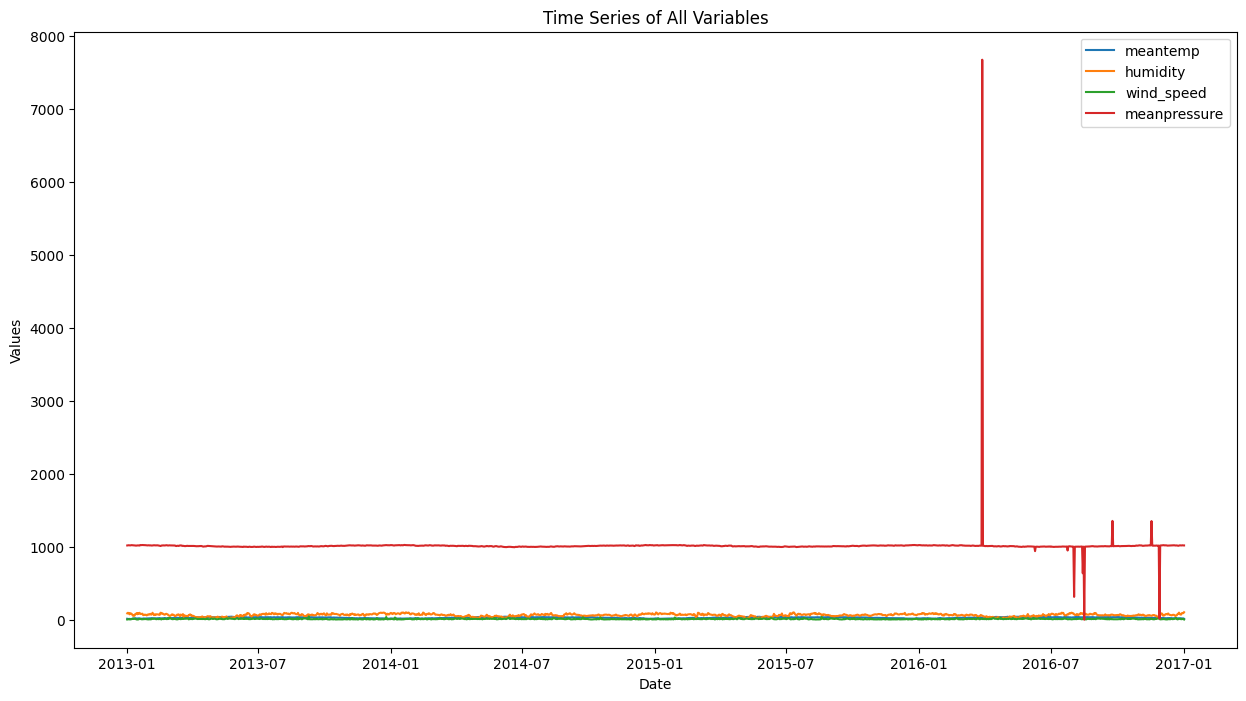

In [ ]:
# Q2: Time Series Visualization

train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

plt.figure(figsize=(15, 8))
for column in train_data.columns:
    plt.plot(train_data[column], label=column)
plt.title("Time Series of All Variables")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

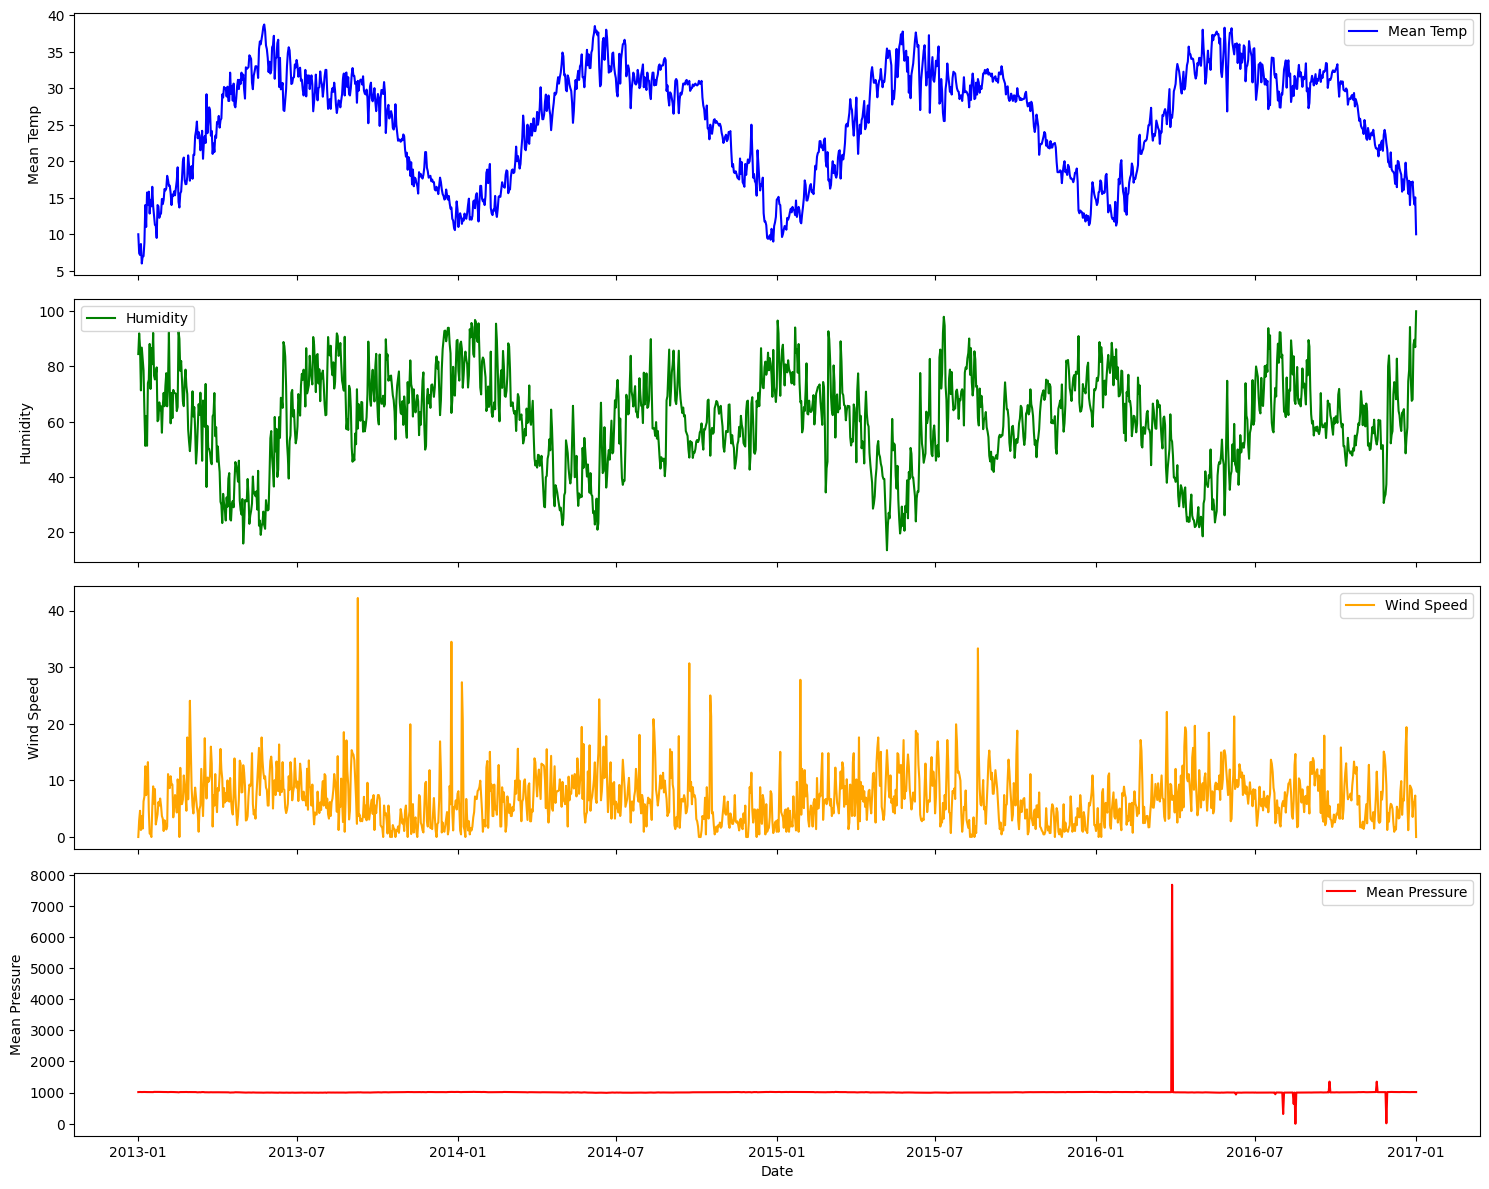

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
ax[0].plot(train_data.index, train_data['meantemp'], label='Mean Temp', color='b')
ax[0].set_ylabel('Mean Temp')
ax[0].legend()

ax[1].plot(train_data.index, train_data['humidity'], label='Humidity', color='g')
ax[1].set_ylabel('Humidity')
ax[1].legend()

ax[2].plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='orange')
ax[2].set_ylabel('Wind Speed')
ax[2].legend()

ax[3].plot(train_data.index, train_data['meanpressure'], label='Mean Pressure', color='r')
ax[3].set_ylabel('Mean Pressure')
ax[3].legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()

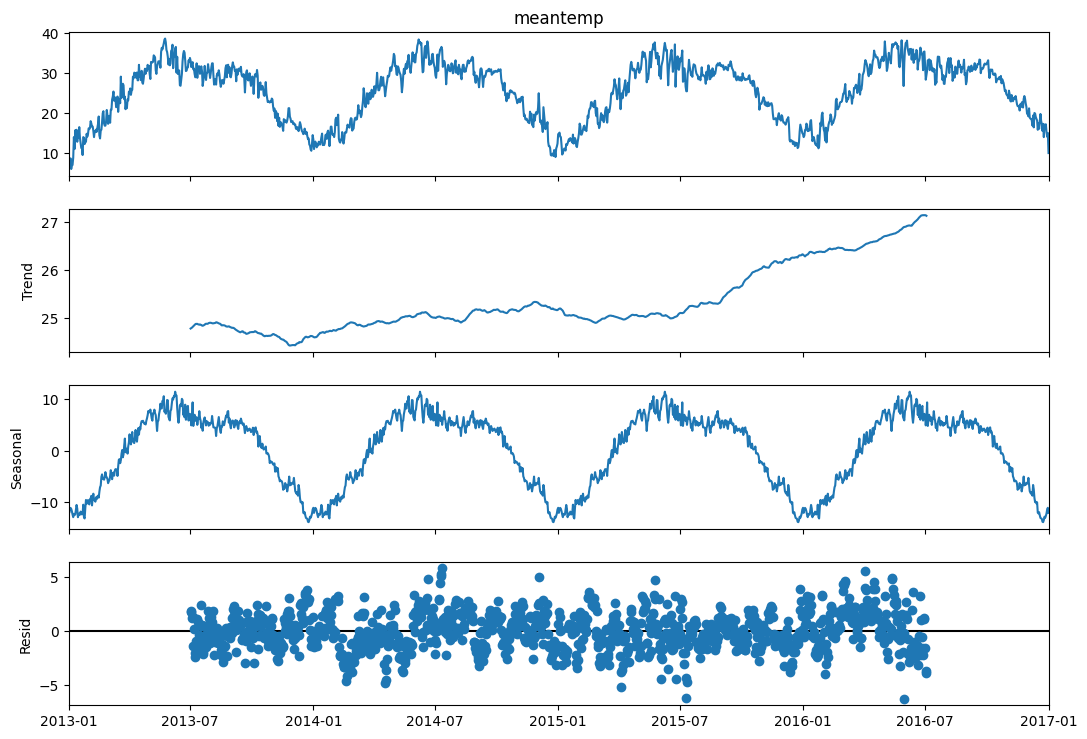

In [ ]:
# Q3: Seasonality and Trends
decomposition = seasonal_decompose(train_data['meantemp'], model='additive', period=365)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


In [ ]:
# Preparing data
y = train_data['meantemp']
train_y, test_y = train_test_split(y, test_size=0.2, shuffle=False)

# Fit ARIMA model
arima_model = ARIMA(train_y, order=(1, 1, 1))
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast for the test period
forecast = arima_result.forecast(steps=len(test_y))

In [ ]:
# Evaluating the forecast
mae = mean_absolute_error(test_y, forecast)
rmse = np.sqrt(mean_squared_error(test_y, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 7.274058180544291
Root Mean Squared Error (RMSE): 8.102417056421306


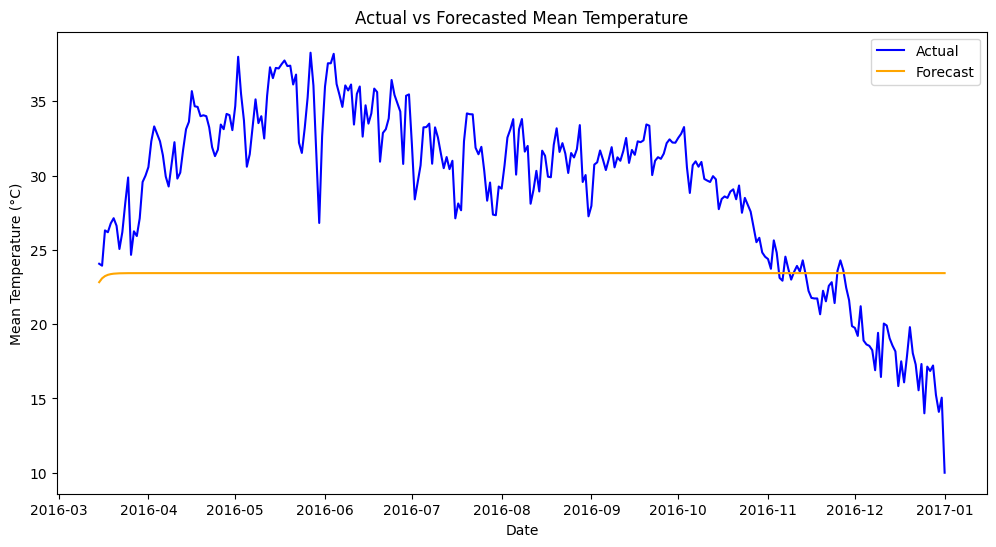

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Actual', color='blue')
plt.plot(test_y.index, forecast, label='Forecast', color='orange')
plt.title('Actual vs Forecasted Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()
